<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Regularization(Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch</strong></p> 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

https://scikit-learn.org/stable/modules/linear_model.html#linear-model

https://www.analyticsvidhya.com/blog/2021/11/study-of-regularization-techniques-of-linear-model-and-its-roles/
https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

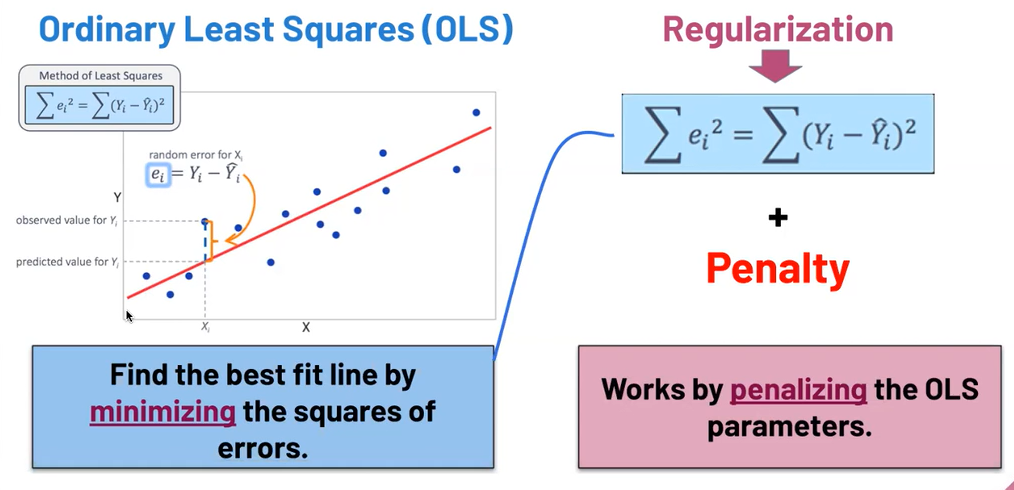
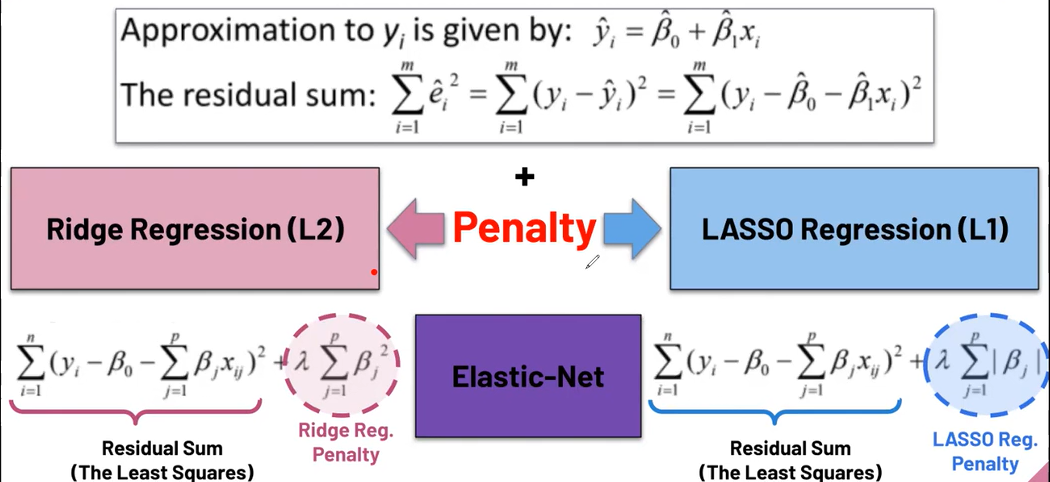

# Ridge Regression
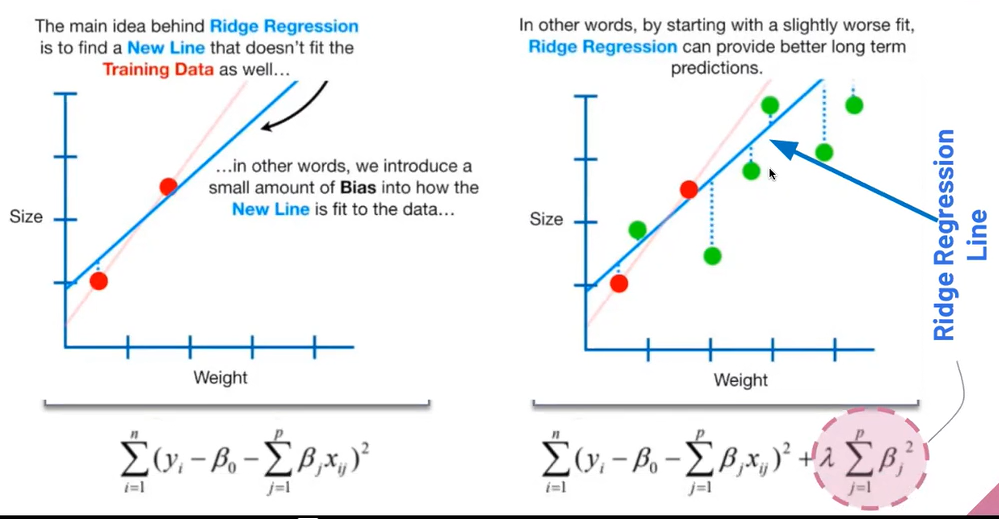
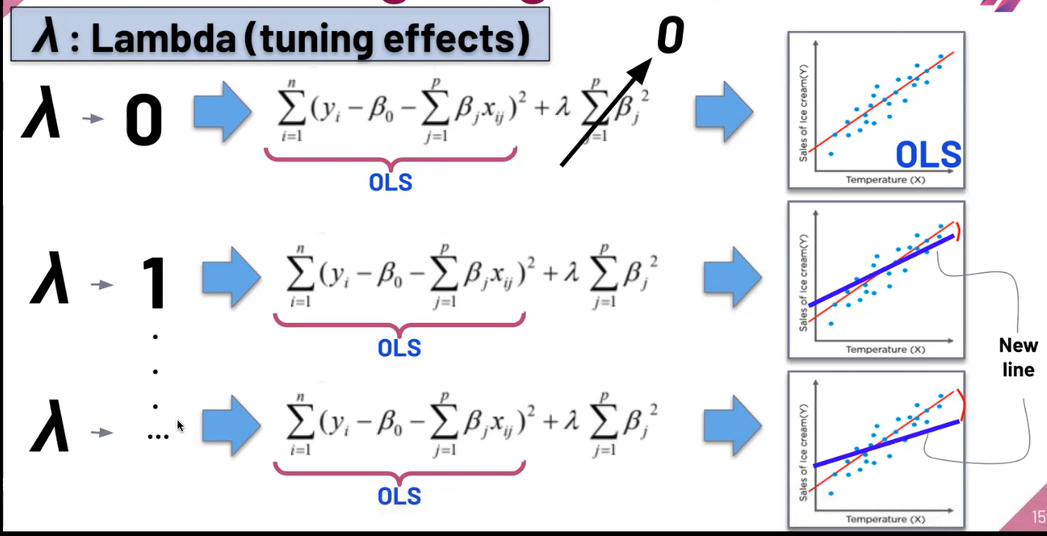
# Lasso Regression
https://nanohub.org/resources/32210/watch?resid=33636

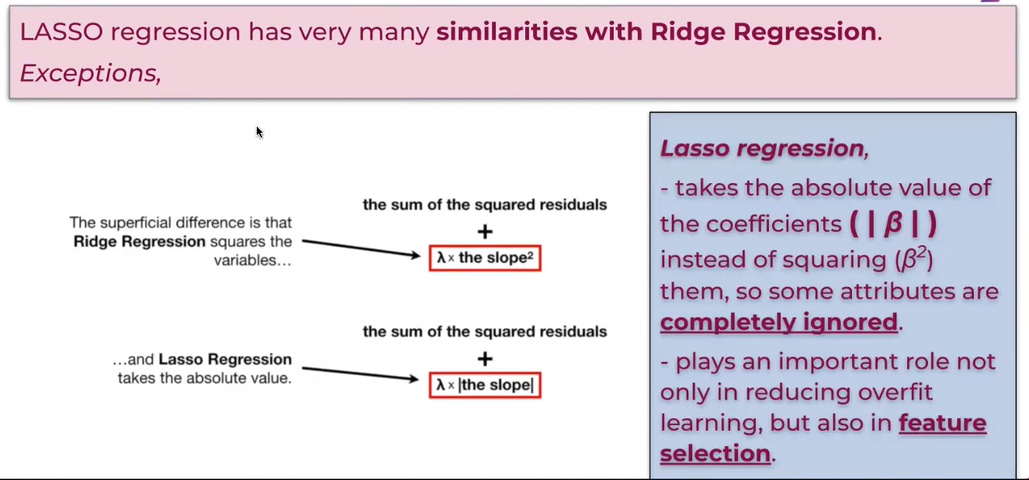


Briefly; 
- OLS simply finds the best unbiased linear fit for given data,
- Ridge  & Lasso regressions give a bias to important features,
- Ridge  & Lasso are good for overfitting and useful for multicolinearity,
- MAE, MSE, RMSE or R^2 can be used to find the best lambda.
> Ridge : Good for group selection, but not good for eliminating predictors. Lasso : Good for eliminating predictors, but not good for grouped selection.
# Elastic-Net
https://machinelearningmastery.com/elastic-net-regression-in-python/
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

# Feature Scaling
https://www.geeksforgeeks.org/ml-feature-scaling-part-1/#:~:text=Feature%20Scaling%20is%20a%20technique,having%20these%20independent%20data%20features.
Scaling is applied for the following 3 reasons:
1. Algorithms rely on distance metrics
2. Gradient Descent
3. Model coefficients
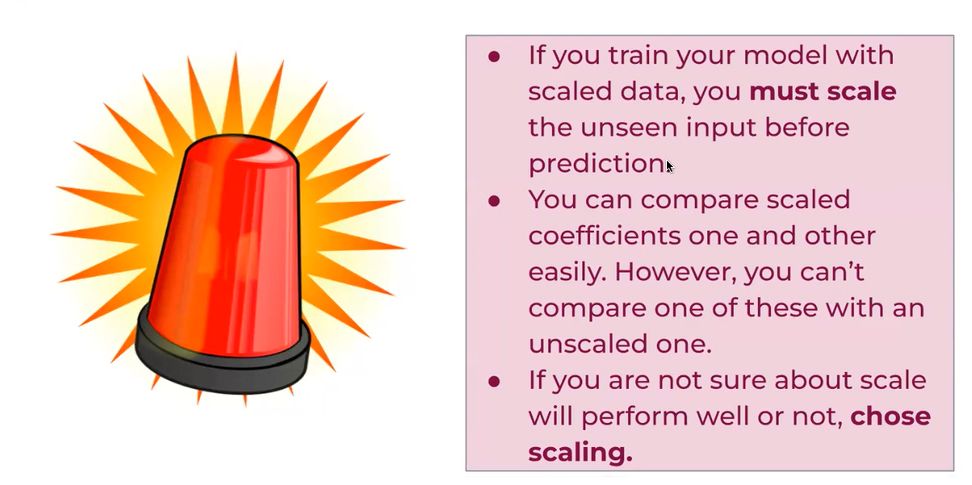
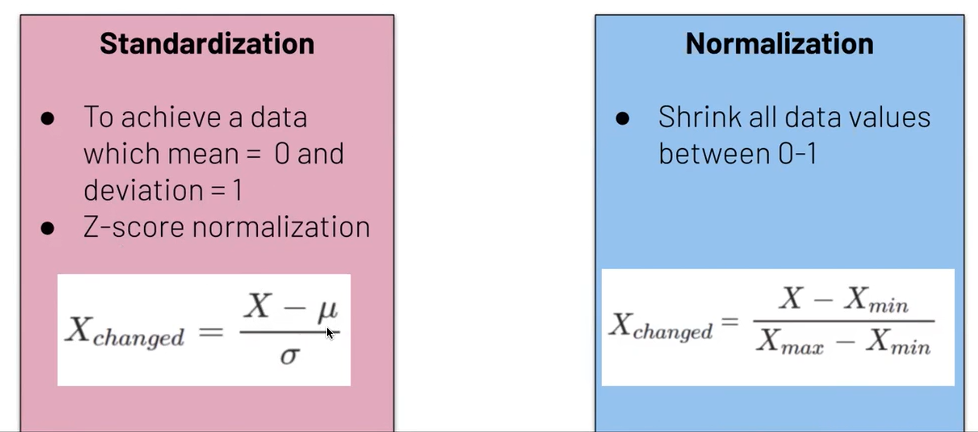
> Only fit to training data. Transform the test for data leakage


# Cross Validation
https://machinelearningmastery.com/k-fold-cross-validation/
> One of the ways of avoiding overfitting is using cross validation, that helps in estimating the error over test set, and in deciding what parameters work best for your model.
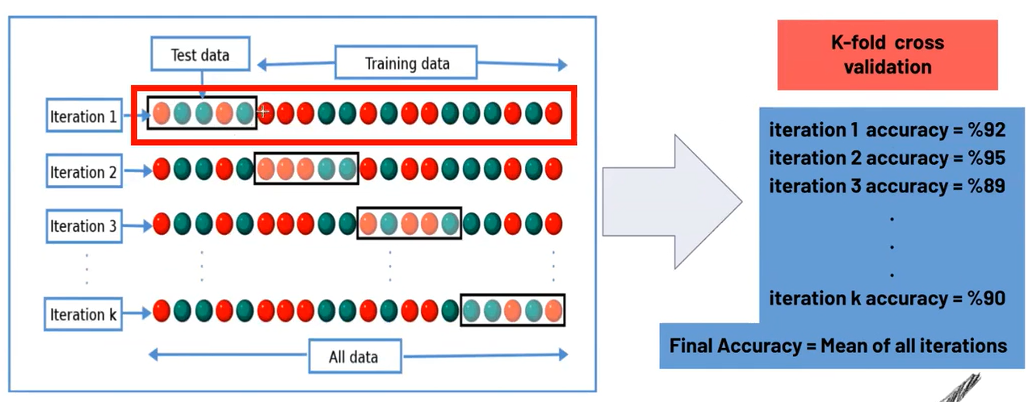
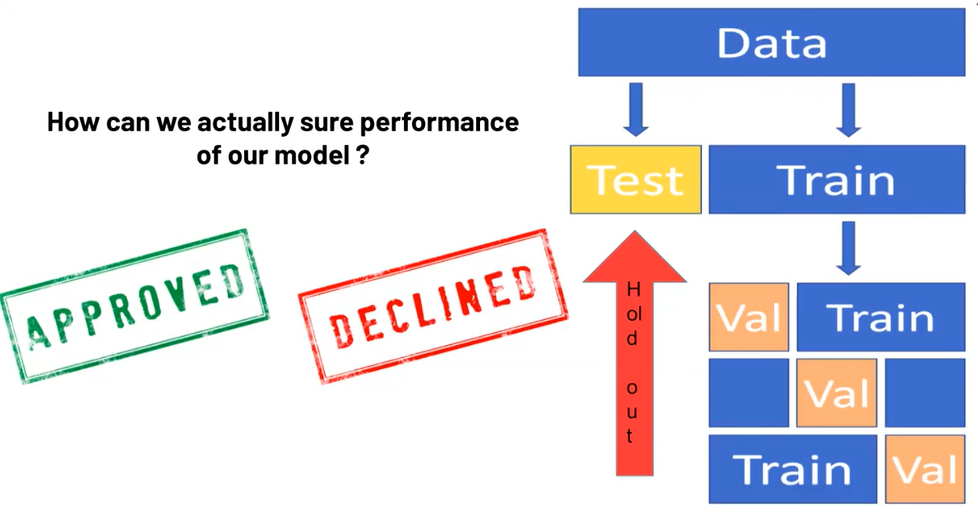

# Grid Search
https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b


# Regularization(Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

## <span style='color:red'> Polinomial Regression</span> 

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
df.shape

(200, 4)

In [5]:
X = df.drop("sales", axis =1)
y = df["sales"]

In [6]:
X.head()

TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

### Polynomial Conversion

In [7]:
from sklearn.preprocessing import PolynomialFeatures

We create an artificial overfiting situation by taking poly feature from 5 degrees

Modelin compleksisi arttıkça overfittinge gider bu yüzden 5.dereceden alalımki karşımıza overfit olmuş bir sonuç çıksın.

In [8]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)  # transform to a polynom taht has 5 degree 

poly_features = polynomial_converter.fit_transform(X)

In [12]:
poly_features.shape  # When it was 5th degree, the number of features increased from 3 to 55.

(200, 55)

In [13]:
X.shape

(200, 3)

### Train | Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
X_train.shape

(140, 55)

In [17]:
X_train

array([[1.93200000e+02, 1.84000000e+01, 6.57000000e+01, ...,
        9.60133791e+07, 3.42830381e+08, 1.22412804e+09],
       [2.87600000e+02, 4.30000000e+01, 7.18000000e+01, ...,
        6.84400383e+08, 1.14278948e+09, 1.90819266e+09],
       [8.02000000e+01, 0.00000000e+00, 9.20000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.59081523e+04],
       ...,
       [2.39800000e+02, 4.10000000e+00, 3.69000000e+01, ...,
        8.44591705e+05, 7.60132535e+06, 6.84119281e+07],
       [2.14700000e+02, 2.40000000e+01, 4.00000000e+00, ...,
        3.68640000e+04, 6.14400000e+03, 1.02400000e+03],
       [1.63300000e+02, 3.16000000e+01, 5.29000000e+01, ...,
        1.47822717e+08, 2.47462713e+08, 4.14265112e+08]])

## Scaling the Data

scaling : Fitting our data to the same ranges. 

**Whether a feature is important or not in ML is expressed with coefficients. The ranges of my features can have different range values for each. If we don't do a scale, features in a large range are weighted more (valid for distance-based models) and our model will return incorrect results. We use scale to prevent this.**

**It also accelerates the work of Gradient descent-based models such as linear, logistic regression.**

**There is no disadvantage of applying scale to data. data scale If you are confused about whether to apply it or not, you can apply scale directly.**

Data leakage: Leakage of information about the data in the test set to the data in the train set

**To prevent leakage, only fit operation is applied to X_train. On the other hand, only transform operation is applied to X_test. no fit operation is applied to all data.

**Target is never scaled. No comparison with other features. 

> The min-max scaler is mostly used when there is a dummy feature.

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
# Robustscaler is used when outlier could be present

scaler = StandardScaler()  # z-score we get an instance from StandardScaler

In [20]:
scaler.fit(X_train)  # Apply just for X_tarin not for X_test (Kalıp çıkarma)

StandardScaler()

In [21]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [22]:
X_test_scaled = scaler.transform(X_test)  # only transform for X_test
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [23]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()
#Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54  
mean -0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [24]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54  
mean -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0  
std   1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0

## Polinomial Regression Model Building

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()  # built model

In [26]:
lm.fit(X_train_scaled, y_train)  # fit the model, to learn

LinearRegression()

In [27]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [28]:
lm.intercept_

14.311428571428602

In [29]:
y_pred = lm.predict(X_test_scaled)  # Predict using the linear model.
y_train_pred = lm.predict(X_train_scaled)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {
            name+"_train": {
                "R2" : r2_score(y_train, y_train_pred),
                "mae" : mean_absolute_error(y_train, y_train_pred),
                "mse" : mean_squared_error(y_train, y_train_pred),                          
                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))
            },

            name+"_test": {
                "R2" : r2_score(y_test, y_pred),
                "mae" : mean_absolute_error(y_test, y_pred),
                "mse" : mean_squared_error(y_test, y_pred),
                "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))
            }
        }
    
    return pd.DataFrame(scores)

In [31]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Is there overfitting?
ls

linear_train  linear_test
R2        0.997607     0.764990
mae       0.186213     0.665959
mse       0.062968     6.634847
rmse      0.250934     2.575820

**While the results are quite good in the train data, the results are very bad in the test data. This indicates overfitting.**

## <span style='color:red'> Multicolineratiy</span> 

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

> Multicollinearity can cause overfitting.

In [32]:
corr = pd.DataFrame(poly_features).corr()

In [33]:
corr[corr < 0].notnull().sum().any()

True

In [34]:
corr[(corr < 0).any()]

0         1         2         3         4         5         6   \
0   1.000000  0.054809  0.056648  0.967662  0.662160  0.603099  0.050844   
52 -0.004329  0.441864  0.740034  0.037872  0.262030  0.445350  0.465716   
53 -0.007060  0.300963  0.661761  0.028539  0.169913  0.396279  0.303686   

          7         8         9         10        11        12        13  \
0   0.046222  0.055626  0.912265  0.721105  0.650492  0.515275  0.466823   
52  0.838881  0.878305  0.069118  0.237365  0.384255  0.305230  0.566333   
53  0.689865  0.845350  0.058006  0.159812  0.339700  0.188239  0.458829   

          14        15        16        17        18        19        20  \
0   0.420083  0.048734  0.039665  0.028958  0.039409  0.855073  0.709761   
52  0.587581  0.458634  0.820331  0.964856  0.917552  0.093242  0.239626   
53  0.564944  0.286024  0.643111  0.877378  0.941973  0.081696  0.171249   

          21        22        23        24        25        26        27  \
0   0.630912  0.584542  0.516807  0.460056  0.437080  0.409771  0.364701   
52  0.374325  0.276302  0.483467  0.493397  0.304825  0.565124  0.677987   
53  0.335749  0.176132  0.392658  0.469091  0.177118  0.434226  0.611994   

          28        29        30        31        32        33        34  \
0   0.315533  0.046959  0.032900  0.017709  0.008777  0.020708  0.801581   
52  0.640902  0.440321  0.781456  0.959432  0.990118  0.896866  0.112417   
53  0.657352  0.262546  0.586641  0.838676  0.974834  0.971064  0.100839   

          35        36        37        38        39        40        41  \
0   0.680833  0.596879  0.588127  0.506564  0.447078  0.505741  0.462847   
52  0.246835  0.375155  0.273561  0.454727  0.466297  0.276713  0.486040   
53  0.185414  0.342267  0.184571  0.378282  0.447209  0.166228  0.375770   

          42        43        44        45        46        47        48  \
0   0.403394  0.346404  0.384146  0.373602  0.343453  0.286909  0.243084   
52  0.559852  0.520099  0.290348  0.539935  0.679648  0.717408  0.653735   
53  0.501714  0.524794  0.158027  0.394446  0.589313  0.703334  0.705927   

          49        50        51        52        53        54  
0   0.045768  0.026080  0.007613 -0.004329 -0.007060  0.004975  
52  0.418511  0.734355  0.930246  1.000000  0.953291  0.852604  
53  0.238741  0.528406  0.782656  0.953291  1.000000  0.962720

In [35]:
def color_red(val):
    if abs(val) > 0.90 and abs(val) < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [36]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## <span style='color:red'> Cross Validation</span> 

We will apply CV to see the real result of our model.

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

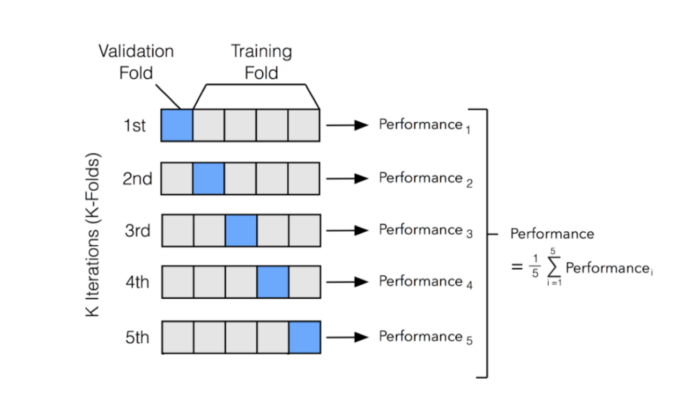

In [37]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jacca

In [56]:
from sklearn.model_selection import cross_validate

In [57]:
model = LinearRegression()
scores = cross_validate(
                model, 
                X_train_scaled, 
                y_train,
                scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                cv = 5
            )

In [58]:
scores  
# CV works to maximize the metrics used. 
# However, we want the errors to be minimum, so we get negative values so that the result is minimized.
# In summary, we want the r2 score to be maximum and the mae,rse and rmse scores to be minimum.

{'fit_time': array([0.00300074, 0.00300074, 0.00299954, 0.0010016 , 0.00199533]),
 'score_time': array([0.00199747, 0.00200367, 0.00099969, 0.00099993, 0.00199962]),
 'test_r2': array([0.36790198, 0.87965778, 0.97756048, 0.98936937, 0.16659583]),
 'test_neg_mean_absolute_error': array([-1.27124712, -0.71046265, -0.39503284, -0.41897731, -1.47409318]),
 'test_neg_mean_squared_error': array([-19.20425854,  -2.71329198,  -0.62290055,  -0.28936097,
        -15.40985579]),
 'test_neg_root_mean_squared_error': array([-4.38226637, -1.64720733, -0.78924049, -0.53792283, -3.92553892])}

In [59]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.003001    0.001997  0.367902                     -1.271247   
2  0.003001    0.002004  0.879658                     -0.710463   
3  0.003000    0.001000  0.977560                     -0.395033   
4  0.001002    0.001000  0.989369                     -0.418977   
5  0.001995    0.002000  0.166596                     -1.474093   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                   -19.204259                         -4.382266  
2                    -2.713292                         -1.647207  
3                    -0.622901                         -0.789240  
4                    -0.289361                         -0.537923  
5                   -15.409856                         -3.925539

In [60]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

In [61]:
score = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv = 5, 
                        return_train_score=True)
df_score =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_score)
df_score.mean()[2:]

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.003001    0.001997  0.367902                     -1.271247   
2  0.003001    0.002004  0.879658                     -0.710463   
3  0.003000    0.001000  0.977560                     -0.395033   
4  0.001002    0.001000  0.989369                     -0.418977   
5  0.001995    0.002000  0.166596                     -1.474093   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                   -19.204259                         -4.382266  
2                    -2.713292                         -1.647207  
3                    -0.622901                         -0.789240  
4                    -0.289361                         -0.537923  
5                   -15.409856                         -3.925539

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

In [62]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

linear_train  linear_test
R2        0.997607     0.764990
mae       0.186213     0.665959
mse       0.062968     6.634847
rmse      0.250934     2.575820

In [63]:
sns.lineplot(data = scores.iloc[:,2:]);

In [65]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [68]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df
# coefficients show us how important which feature is.

lm_coef
0    13.942084
1    -3.147845
2     0.622117
3   -58.348614
4    17.227695
5    -3.875031
6    14.688014
7     0.835494
8    -2.765824
9   115.503087
10  -28.684170
11   20.257596
12   -7.338979
13  -19.840491
14    9.183389
15  -25.162985
16  -16.859628
17   22.723785
18   -3.581168
19 -103.955734
20   28.837309
21  -35.712475
22   -3.671007
23   39.849162
24  -15.897735
25    3.956800
26    5.331437
27    7.516232
28  -14.305237
29   22.095444
30   23.111981
31  -12.074690
32  -29.920346
33   22.775684
34   34.742828
35  -12.527750
36   18.231022
37   11.082281
38  -24.335582
39   13.039461
40  -11.738058
41    7.369086
42  -15.865076
43    8.171488
44    8.933054
45  -10.070050
46    1.904587
47    7.065967
48   -0.257477
49  -10.689878
50   -5.390108
51   -1.578588
52   11.400894
53    6.352215
54  -13.457603

## <span style='color:red'> Ridge Regression</span> 

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting. 

In [88]:
from sklearn.linear_model import Ridge

In [89]:
ridge_model = Ridge(alpha=1, random_state=42)

In [90]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [91]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [92]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

ridge_train  ridge_test
R2       0.988677    0.982511
mae      0.338149    0.482446
mse      0.297970    0.493743
rmse     0.545866    0.702669

In [93]:
pd.concat([ls, rs], axis=1)

linear_train  linear_test  ridge_train  ridge_test
R2        0.997607     0.764990     0.988677    0.982511
mae       0.186213     0.665959     0.338149    0.482446
mse       0.062968     6.634847     0.297970    0.493743
rmse      0.250934     2.575820     0.545866    0.702669

When Ridge regression was applied, train and test results converged. Overfitting has been prevented.
Low bias- low variance

## For Ridge Regression CV with alpha : 1 

Let's take a look at the actual scores of our model with CV:

In [94]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=5)

In [96]:
pd.DataFrame(scores, index = range(1, 6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.002998    0.004002  0.988913                     -0.405789   
2  0.000999    0.001001  0.969951                     -0.551469   
3  0.000998    0.001000  0.950978                     -0.552320   
4  0.001999    0.001001  0.991259                     -0.365106   
5  0.001004    0.001997  0.986854                     -0.343011   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -0.336840                         -0.580379  
2                    -0.677493                         -0.823099  
3                    -1.360795                         -1.166531  
4                    -0.237919                         -0.487769  
5                    -0.243072                         -0.493023

In [97]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

In [98]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

ridge_train  ridge_test
R2       0.988677    0.982511
mae      0.338149    0.482446
mse      0.297970    0.493743
rmse     0.545866    0.702669

In [99]:
sns.lineplot(data = scores.iloc[:,2:])

<AxesSubplot:>

In [104]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [106]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [107]:
pd.concat([lm_df,rm_df], axis = 1)

lm_coef  ridge_coef_1
0    13.942084      3.428822
1    -3.147845      0.689086
2     0.622117      0.170305
3   -58.348614     -0.910850
4    17.227695      2.723077
5    -3.875031      0.112909
6    14.688014     -0.404686
7     0.835494      0.287950
8    -2.765824     -0.091937
9   115.503087     -1.014535
10  -28.684170     -0.075344
11   20.257596     -0.708634
12   -7.338979      1.473254
13  -19.840491      0.148905
14    9.183389      0.005407
15  -25.162985     -0.471916
16  -16.859628      0.031128
17   22.723785     -0.091424
18   -3.581168      0.109397
19 -103.955734     -0.294351
20   28.837309     -0.069994
21  -35.712475     -0.179886
22   -3.671007     -0.482892
23   39.849162     -0.241550
24  -15.897735     -0.070462
25    3.956800      0.781238
26    5.331437     -0.032908
27    7.516232      0.002162
28  -14.305237     -0.028680
29   22.095444     -0.186743
30   23.111981      0.011304
31  -12.074690     -0.070924
32  -29.920346     -0.035974
33   22.775684      0.126281
34   34.742828      0.453132
35  -12.527750      0.490794
36   18.231022      0.492974
37   11.082281     -0.288061
38  -24.335582      0.271084
39   13.039461      0.321891
40  -11.738058     -0.829983
41    7.369086     -0.203685
42  -15.865076      0.135190
43    8.171488     -0.009810
44    8.933054      0.354290
45  -10.070050     -0.169830
46    1.904587      0.101346
47    7.065967     -0.039472
48   -0.257477     -0.236645
49  -10.689878      0.165347
50   -5.390108      0.030197
51   -1.578588      0.009304
52   11.400894      0.024671
53    6.352215     -0.050716
54  -13.457603     -0.041555

Now let's try to choose the best alpha value with CV by changing the alpha value:

## Choosing best alpha value with Cross-Validation

In [108]:
from sklearn.linear_model import RidgeCV

In [117]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

> We can only use one score metric in Gridsearch, RidgeCV, and LassoCV. Let's not forget that this score is maximized in the CV.

In [118]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [120]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [166]:
# ridge_cv_model.coef_

In [167]:
# ridge_cv_model.get_params()

In [121]:
ridge_cv_model.alpha_ #Ridge(alpha=0.02)

0.02

In [131]:
pd.concat([pd.Series(ridge_cv_model.alpha_* ridge_model.coef_,name="ridge"),pd.Series(ridge_model.coef_,name="ols")],axis=1)

ridge       ols
0   0.068576  3.428822
1   0.013782  0.689086
2   0.003406  0.170305
3  -0.018217 -0.910850
4   0.054462  2.723077
5   0.002258  0.112909
6  -0.008094 -0.404686
7   0.005759  0.287950
8  -0.001839 -0.091937
9  -0.020291 -1.014535
10 -0.001507 -0.075344
11 -0.014173 -0.708634
12  0.029465  1.473254
13  0.002978  0.148905
14  0.000108  0.005407
15 -0.009438 -0.471916
16  0.000623  0.031128
17 -0.001828 -0.091424
18  0.002188  0.109397
19 -0.005887 -0.294351
20 -0.001400 -0.069994
21 -0.003598 -0.179886
22 -0.009658 -0.482892
23 -0.004831 -0.241550
24 -0.001409 -0.070462
25  0.015625  0.781238
26 -0.000658 -0.032908
27  0.000043  0.002162
28 -0.000574 -0.028680
29 -0.003735 -0.186743
30  0.000226  0.011304
31 -0.001418 -0.070924
32 -0.000719 -0.035974
33  0.002526  0.126281
34  0.009063  0.453132
35  0.009816  0.490794
36  0.009859  0.492974
37 -0.005761 -0.288061
38  0.005422  0.271084
39  0.006438  0.321891
40 -0.016600 -0.829983
41 -0.004074 -0.203685
42  0.002704  0.135190
43 -0.000196 -0.009810
44  0.007086  0.354290
45 -0.003397 -0.169830
46  0.002027  0.101346
47 -0.000789 -0.039472
48 -0.004733 -0.236645
49  0.003307  0.165347
50  0.000604  0.030197
51  0.000186  0.009304
52  0.000493  0.024671
53 -0.001014 -0.050716
54 -0.000831 -0.041555

In [132]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-0.65304065195516

In [135]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [136]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

ridge_cv_train  ridge_cv_test
R2          0.994491       0.983643
mae         0.244842       0.442087
mse         0.144977       0.461803
rmse        0.380758       0.679561

In [137]:
pd.concat([ls, rs, rcs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  
R2         0.983643  
mae        0.442087  
mse        0.461803  
rmse       0.679561

## <span style='color:red'> Lasso Regression</span> 

In [138]:
from sklearn.linear_model import Lasso, LassoCV

In [140]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [141]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [142]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss
#there is no overfitting

lasso_train  lasso_test
R2       0.919650    0.918590
mae      1.018355    1.017959
mse      2.114491    2.298390
rmse     1.454129    1.516044

In [143]:
pd.concat([ls, rs, rcs, lss], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  lasso_train  lasso_test  
R2         0.983643     0.919650    0.918590  
mae        0.442087     1.018355    1.017959  
mse        0.461803     2.114491    2.298390  
rmse       0.679561     1.454129    1.516044

In [144]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

> While Ridge trades with 55 features, Lasso creates the model with only 2 features.

In [146]:
lasso_model.intercept_

14.311428571428573

## For Lasso CV with Default Alpha : 1

Let's apply a 5-fold CV to see the real scores of our model:

In [148]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=5
                       )

In [149]:
pd.DataFrame(scores, index = range(1, 6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.002999    0.001003  0.924246                     -1.155268   
2  0.000999    0.001001  0.955624                     -0.656358   
3  0.001001    0.000999  0.888327                     -1.072936   
4  0.002003    0.000999  0.896199                     -1.255165   
5  0.001001    0.001992  0.903545                     -1.056538   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -2.301550                         -1.517086  
2                    -1.000530                         -1.000265  
3                    -3.099952                         -1.760668  
4                    -2.825429                         -1.680901  
5                    -1.783470                         -1.335466

In [150]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.913588
test_neg_mean_absolute_error       -1.039253
test_neg_mean_squared_error        -2.202186
test_neg_root_mean_squared_error   -1.458877
dtype: float64

In [151]:
pd.DataFrame(scores.iloc[:,2:].mean(), )

0
test_r2                           0.913588
test_neg_mean_absolute_error     -1.039253
test_neg_mean_squared_error      -2.202186
test_neg_root_mean_squared_error -1.458877

In [152]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

lasso_train  lasso_test
R2       0.919650    0.918590
mae      1.018355    1.017959
mse      2.114491    2.298390
rmse     1.454129    1.516044

<AxesSubplot:>

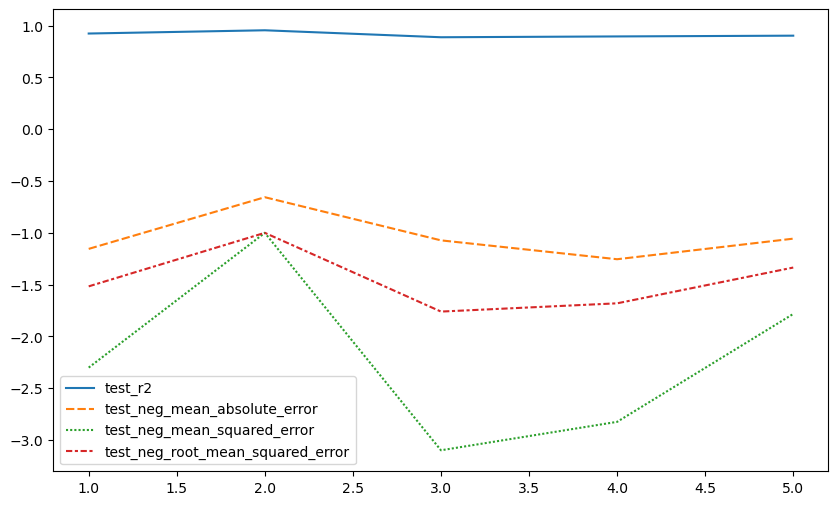

In [153]:
sns.lineplot(data = scores.iloc[:,2:])

In [154]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [155]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [161]:
pd.concat([lm_df, rm_df, lsm_df], axis = 1)

lm_coef  ridge_coef_1  lasso_coef_1
0    13.942084      3.428822      0.696016
1    -3.147845      0.689086      0.000000
2     0.622117      0.170305      0.000000
3   -58.348614     -0.910850      0.000000
4    17.227695      2.723077      3.490946
5    -3.875031      0.112909      0.000000
6    14.688014     -0.404686      0.000000
7     0.835494      0.287950      0.000000
8    -2.765824     -0.091937      0.000000
9   115.503087     -1.014535      0.000000
10  -28.684170     -0.075344      0.000000
11   20.257596     -0.708634      0.000000
12   -7.338979      1.473254      0.000000
13  -19.840491      0.148905      0.000000
14    9.183389      0.005407      0.000000
15  -25.162985     -0.471916      0.000000
16  -16.859628      0.031128      0.000000
17   22.723785     -0.091424      0.000000
18   -3.581168      0.109397      0.000000
19 -103.955734     -0.294351      0.000000
20   28.837309     -0.069994      0.000000
21  -35.712475     -0.179886      0.000000
22   -3.671007     -0.482892      0.000000
23   39.849162     -0.241550      0.000000
24  -15.897735     -0.070462      0.000000
25    3.956800      0.781238      0.000000
26    5.331437     -0.032908      0.000000
27    7.516232      0.002162      0.000000
28  -14.305237     -0.028680      0.000000
29   22.095444     -0.186743      0.000000
30   23.111981      0.011304      0.000000
31  -12.074690     -0.070924      0.000000
32  -29.920346     -0.035974      0.000000
33   22.775684      0.126281      0.000000
34   34.742828      0.453132      0.000000
35  -12.527750      0.490794      0.000000
36   18.231022      0.492974      0.000000
37   11.082281     -0.288061      0.000000
38  -24.335582      0.271084      0.000000
39   13.039461      0.321891      0.000000
40  -11.738058     -0.829983      0.000000
41    7.369086     -0.203685      0.000000
42  -15.865076      0.135190      0.000000
43    8.171488     -0.009810      0.000000
44    8.933054      0.354290      0.000000
45  -10.070050     -0.169830      0.000000
46    1.904587      0.101346      0.000000
47    7.065967     -0.039472      0.000000
48   -0.257477     -0.236645      0.000000
49  -10.689878      0.165347      0.000000
50   -5.390108      0.030197      0.000000
51   -1.578588      0.009304      0.000000
52   11.400894      0.024671      0.000000
53    6.352215     -0.050716      0.000000
54  -13.457603     -0.041555      0.000000

### Choosing best alpha value with Cross-Validation

In [162]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [163]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [164]:
lasso_cv_model.alpha_

0.01

In [176]:
np.where(alpha_space==lasso_cv_model.alpha_)

(array([0], dtype=int64),)

In [178]:
# mse score for CV
lasso_cv_model.mse_path_[99].mean()

0.4118332980702015

In [179]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [180]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

lasso_cv_train  lasso_cv_test
R2          0.988824       0.986295
mae         0.339065       0.440975
mse         0.294098       0.386919
rmse        0.542308       0.622028

In [181]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  
R2         0.983643     0.919650    0.918590        0.988824       0.986295  
mae        0.442087     1.018355    1.017959        0.339065       0.440975  
mse        0.461803     2.114491    2.298390        0.294098       0.386919  
rmse       0.679561     1.454129    1.516044        0.542308       0.622028

In [182]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

The LassoCV model predicts with 10 features.

In [183]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [185]:
pd.concat([lm_df, rm_df, lcm_df], axis = 1)

lm_coef  ridge_coef_1  lasso_cv_coef_0.01
0    13.942084      3.428822            4.270214
1    -3.147845      0.689086            0.180374
2     0.622117      0.170305            0.139659
3   -58.348614     -0.910850           -3.146055
4    17.227695      2.723077            4.153400
5    -3.875031      0.112909           -0.000000
6    14.688014     -0.404686            0.000000
7     0.835494      0.287950            0.062497
8    -2.765824     -0.091937            0.000000
9   115.503087     -1.014535           -0.000000
10  -28.684170     -0.075344           -0.430498
11   20.257596     -0.708634           -0.174338
12   -7.338979      1.473254            0.000000
13  -19.840491      0.148905           -0.000000
14    9.183389      0.005407           -0.000000
15  -25.162985     -0.471916            0.000000
16  -16.859628      0.031128            0.000000
17   22.723785     -0.091424            0.000000
18   -3.581168      0.109397            0.000000
19 -103.955734     -0.294351            0.000000
20   28.837309     -0.069994           -0.000000
21  -35.712475     -0.179886           -0.000000
22   -3.671007     -0.482892           -0.000000
23   39.849162     -0.241550           -0.000000
24  -15.897735     -0.070462           -0.000000
25    3.956800      0.781238            0.000000
26    5.331437     -0.032908           -0.000000
27    7.516232      0.002162           -0.000000
28  -14.305237     -0.028680           -0.000000
29   22.095444     -0.186743            0.000000
30   23.111981      0.011304            0.000000
31  -12.074690     -0.070924            0.000000
32  -29.920346     -0.035974            0.000000
33   22.775684      0.126281           -0.000000
34   34.742828      0.453132            0.487387
35  -12.527750      0.490794           -0.000000
36   18.231022      0.492974            0.000000
37   11.082281     -0.288061           -0.000000
38  -24.335582      0.271084           -0.000000
39   13.039461      0.321891            0.000000
40  -11.738058     -0.829983           -0.000000
41    7.369086     -0.203685           -0.000000
42  -15.865076      0.135190           -0.000000
43    8.171488     -0.009810           -0.000000
44    8.933054      0.354290            0.069298
45  -10.070050     -0.169830           -0.000000
46    1.904587      0.101346           -0.000000
47    7.065967     -0.039472           -0.000000
48   -0.257477     -0.236645           -0.000000
49  -10.689878      0.165347            0.000000
50   -5.390108      0.030197            0.000000
51   -1.578588      0.009304            0.000000
52   11.400894      0.024671            0.000000
53    6.352215     -0.050716            0.000000
54  -13.457603     -0.041555           -0.000000

## <span style='color:blue'> Feature importances with Ridge</span> 

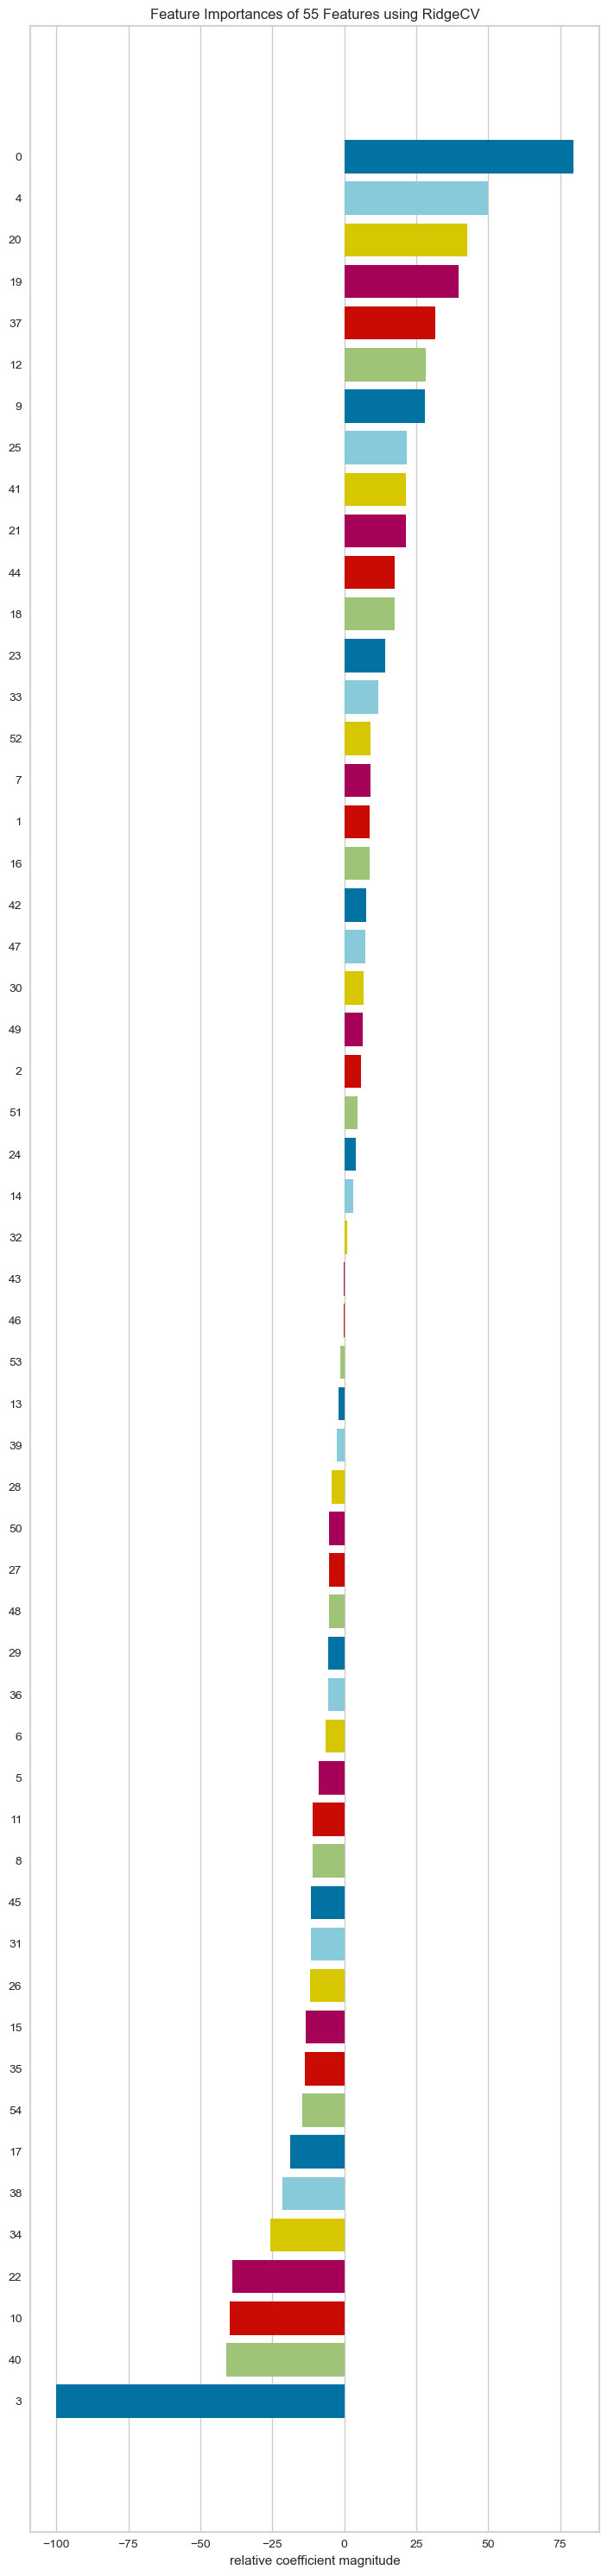

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [189]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

## <span style='color:blue'> Feature importances with Lasso</span> 

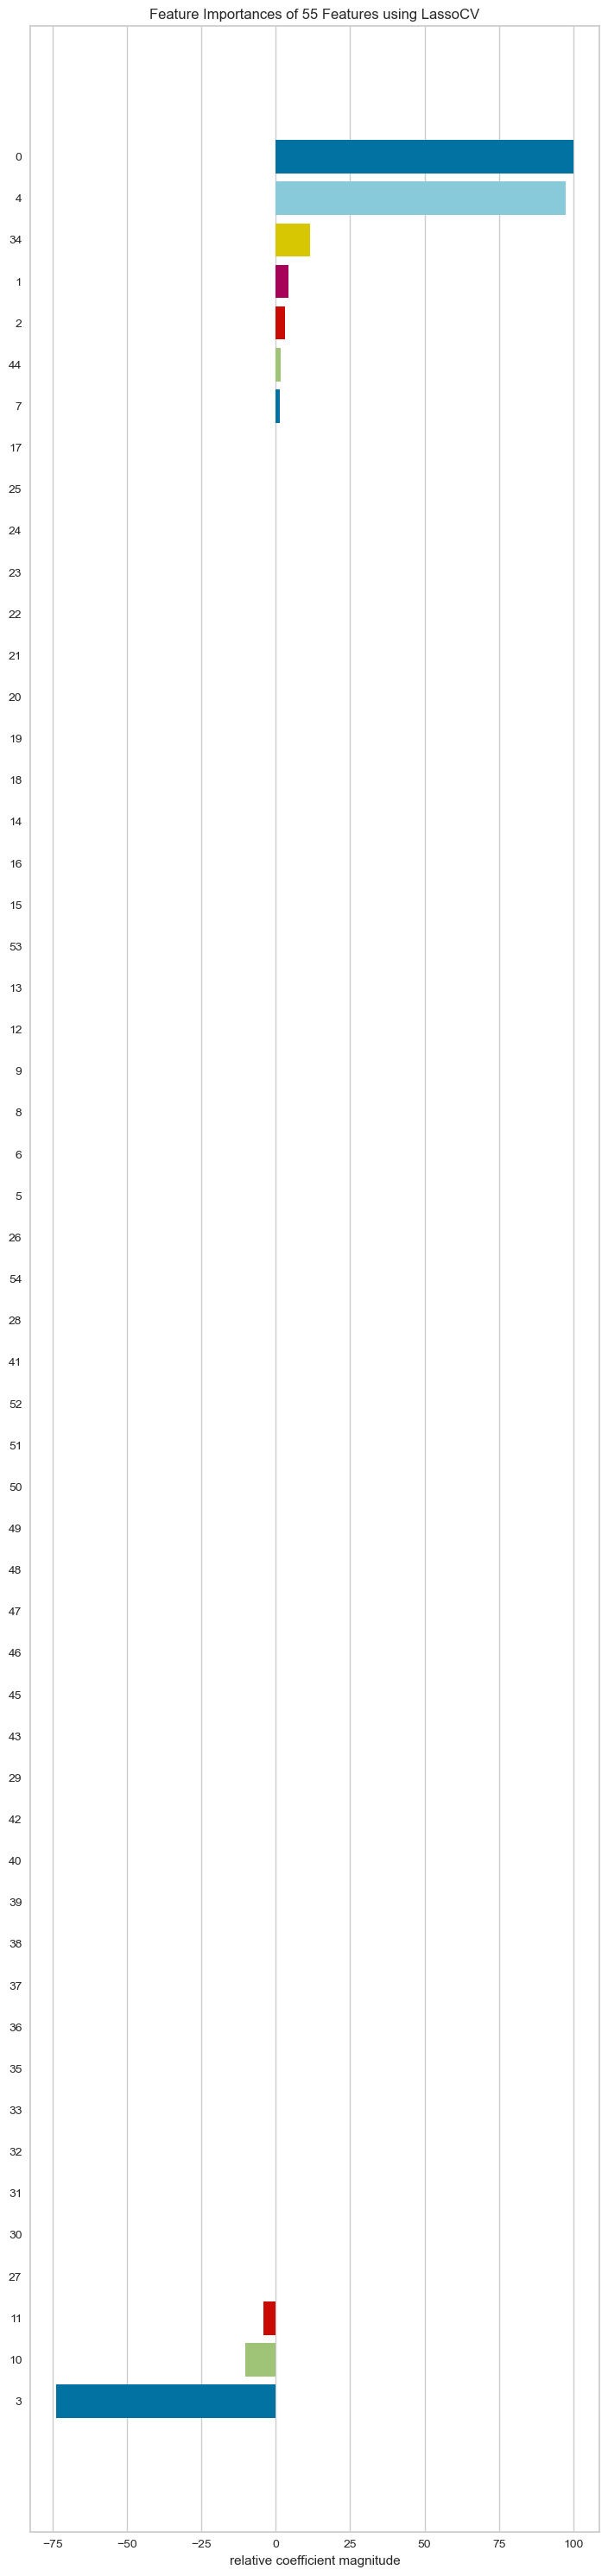

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [190]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

## <span style='color:red'> Elastic net</span> 

In [191]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [193]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) 
# l1_ratio: 1: Lasso or 0:Ridge, 
# l1_ratio: It is the parameter that specifies how much to use from Ridge and Lasso.
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [194]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [196]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es
# there is no overfitting but underfitting for defaults

elastic_train  elastic_test
R2         0.896126      0.902016
mae        1.248480      1.200654
mse        2.733565      2.766287
rmse       1.653350      1.663216

In [197]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  \
R2         0.983643     0.919650    0.918590        0.988824       0.986295   
mae        0.442087     1.018355    1.017959        0.339065       0.440975   
mse        0.461803     2.114491    2.298390        0.294098       0.386919   
rmse       0.679561     1.454129    1.516044        0.542308       0.622028   

      elastic_train  elastic_test  
R2         0.896126      0.902016  
mae        1.248480      1.200654  
mse        2.733565      2.766287  
rmse       1.653350      1.663216

In [198]:
import webbrowser

webbrowser.open_new("https://learnerjoy.com/ridge-regression-lasso-regression-elastic-net-regression/")
webbrowser.open_new("https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html")

True

## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [201]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(
                model,
                X_train_scaled, 
                y_train,
                scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                cv=5)

In [202]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1  0.915497                     -1.255282                    -2.567362   
2  0.928138                     -0.960011                    -1.620225   
3  0.855390                     -1.373843                    -4.014250   
4  0.875648                     -1.431847                    -3.384817   
5  0.840262                     -1.449269                    -2.953597   

   test_neg_root_mean_squared_error  
1                         -1.602299  
2                         -1.272881  
3                         -2.003559  
4                         -1.839787  
5                         -1.718603

In [203]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.882987
test_neg_mean_absolute_error       -1.294050
test_neg_mean_squared_error        -2.908050
test_neg_root_mean_squared_error   -1.687426
dtype: float64

In [204]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

elastic_train  elastic_test
R2         0.896126      0.902016
mae        1.248480      1.200654
mse        2.733565      2.766287
rmse       1.653350      1.663216

In [205]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [206]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [207]:
pd.concat([lm_df, rm_df, lsm_df, em_df], axis = 1)

lm_coef  ridge_coef_1  lasso_coef_1  elastic_coef_(alp:1, l1:0.5)
0    13.942084      3.428822      0.696016                      0.862936
1    -3.147845      0.689086      0.000000                      0.211443
2     0.622117      0.170305      0.000000                      0.000000
3   -58.348614     -0.910850      0.000000                      0.290767
4    17.227695      2.723077      3.490946                      0.980991
5    -3.875031      0.112909      0.000000                      0.002498
6    14.688014     -0.404686      0.000000                      0.000000
7     0.835494      0.287950      0.000000                      0.000000
8    -2.765824     -0.091937      0.000000                      0.000000
9   115.503087     -1.014535      0.000000                      0.000000
10  -28.684170     -0.075344      0.000000                      0.520218
11   20.257596     -0.708634      0.000000                      0.000000
12   -7.338979      1.473254      0.000000                      0.602398
13  -19.840491      0.148905      0.000000                      0.096160
14    9.183389      0.005407      0.000000                      0.000000
15  -25.162985     -0.471916      0.000000                      0.000000
16  -16.859628      0.031128      0.000000                      0.000000
17   22.723785     -0.091424      0.000000                      0.000000
18   -3.581168      0.109397      0.000000                      0.000000
19 -103.955734     -0.294351      0.000000                      0.000000
20   28.837309     -0.069994      0.000000                      0.159702
21  -35.712475     -0.179886      0.000000                      0.000000
22   -3.671007     -0.482892      0.000000                      0.274232
23   39.849162     -0.241550      0.000000                      0.000000
24  -15.897735     -0.070462      0.000000                      0.000000
25    3.956800      0.781238      0.000000                      0.340725
26    5.331437     -0.032908      0.000000                      0.000000
27    7.516232      0.002162      0.000000                      0.000000
28  -14.305237     -0.028680      0.000000                      0.000000
29   22.095444     -0.186743      0.000000                      0.000000
30   23.111981      0.011304      0.000000                      0.000000
31  -12.074690     -0.070924      0.000000                      0.000000
32  -29.920346     -0.035974      0.000000                      0.000000
33   22.775684      0.126281      0.000000                      0.000000
34   34.742828      0.453132      0.000000                      0.000000
35  -12.527750      0.490794      0.000000                      0.000000
36   18.231022      0.492974      0.000000                      0.000000
37   11.082281     -0.288061      0.000000                      0.000000
38  -24.335582      0.271084      0.000000                      0.000000
39   13.039461      0.321891      0.000000                      0.000000
40  -11.738058     -0.829983      0.000000                      0.082652
41    7.369086     -0.203685      0.000000                      0.000000
42  -15.865076      0.135190      0.000000                      0.000000
43    8.171488     -0.009810      0.000000                      0.000000
44    8.933054      0.354290      0.000000                      0.157093
45  -10.070050     -0.169830      0.000000                      0.000000
46    1.904587      0.101346      0.000000                      0.000000
47    7.065967     -0.039472      0.000000                      0.000000
48   -0.257477     -0.236645      0.000000                      0.000000
49  -10.689878      0.165347      0.000000                      0.000000
50   -5.390108      0.030197      0.000000                      0.000000
51   -1.578588      0.009304      0.000000                      0.000000
52   11.400894      0.024671      0.000000                      0.000000
53    6.352215     -0.050716      0.000000                      0

### Choosing best alpha and l1_ratio values with Cross-Validation

In [226]:
elastic_cv_model = ElasticNetCV(
                                alphas = alpha_space, 
                                l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], 
                                cv = 5, 
                                max_iter = 100000,
                                random_state=42
                               )

In [227]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [228]:
elastic_cv_model.alpha_

0.01

In [229]:
elastic_cv_model.l1_ratio_  # That means it is Lasso

1.0

In [230]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [231]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

elastic_cv_train  elastic_cv_test
R2            0.988824         0.986295
mae           0.339065         0.440975
mse           0.294098         0.386919
rmse          0.542308         0.622028

In [232]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.997607     0.764990     0.988677    0.982511        0.994491   
mae       0.186213     0.665959     0.338149    0.482446        0.244842   
mse       0.062968     6.634847     0.297970    0.493743        0.144977   
rmse      0.250934     2.575820     0.545866    0.702669        0.380758   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  \
R2         0.983643     0.919650    0.918590        0.988824       0.986295   
mae        0.442087     1.018355    1.017959        0.339065       0.440975   
mse        0.461803     2.114491    2.298390        0.294098       0.386919   
rmse       0.679561     1.454129    1.516044        0.542308       0.622028   

      elastic_train  elastic_test  elastic_cv_train  elastic_cv_test  
R2         0.896126      0.902016          0.988824         0.986295  
mae        1.248480      1.200654          0.339065         0.440975  
mse        2.733565      2.766287          0.294098         0.386919  
rmse       1.653350      1.663216          0.542308         0.622028

In [233]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [234]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [235]:
pd.concat([lm_df, rm_df, lsm_df, em_df,ecm_df], axis = 1)

lm_coef  ridge_coef_1  lasso_coef_1  elastic_coef_(alp:1, l1:0.5)  \
0    13.942084      3.428822      0.696016                      0.862936   
1    -3.147845      0.689086      0.000000                      0.211443   
2     0.622117      0.170305      0.000000                      0.000000   
3   -58.348614     -0.910850      0.000000                      0.290767   
4    17.227695      2.723077      3.490946                      0.980991   
5    -3.875031      0.112909      0.000000                      0.002498   
6    14.688014     -0.404686      0.000000                      0.000000   
7     0.835494      0.287950      0.000000                      0.000000   
8    -2.765824     -0.091937      0.000000                      0.000000   
9   115.503087     -1.014535      0.000000                      0.000000   
10  -28.684170     -0.075344      0.000000                      0.520218   
11   20.257596     -0.708634      0.000000                      0.000000   
12   -7.338979      1.473254      0.000000                      0.602398   
13  -19.840491      0.148905      0.000000                      0.096160   
14    9.183389      0.005407      0.000000                      0.000000   
15  -25.162985     -0.471916      0.000000                      0.000000   
16  -16.859628      0.031128      0.000000                      0.000000   
17   22.723785     -0.091424      0.000000                      0.000000   
18   -3.581168      0.109397      0.000000                      0.000000   
19 -103.955734     -0.294351      0.000000                      0.000000   
20   28.837309     -0.069994      0.000000                      0.159702   
21  -35.712475     -0.179886      0.000000                      0.000000   
22   -3.671007     -0.482892      0.000000                      0.274232   
23   39.849162     -0.241550      0.000000                      0.000000   
24  -15.897735     -0.070462      0.000000                      0.000000   
25    3.956800      0.781238      0.000000                      0.340725   
26    5.331437     -0.032908      0.000000                      0.000000   
27    7.516232      0.002162      0.000000                      0.000000   
28  -14.305237     -0.028680      0.000000                      0.000000   
29   22.095444     -0.186743      0.000000                      0.000000   
30   23.111981      0.011304      0.000000                      0.000000   
31  -12.074690     -0.070924      0.000000                      0.000000   
32  -29.920346     -0.035974      0.000000                      0.000000   
33   22.775684      0.126281      0.000000                      0.000000   
34   34.742828      0.453132      0.000000                      0.000000   
35  -12.527750      0.490794      0.000000                      0.000000   
36   18.231022      0.492974      0.000000                      0.000000   
37   11.082281     -0.288061      0.000000                      0.000000   
38  -24.335582      0.271084      0.000000                      0.000000   
39   13.039461      0.321891      0.000000                      0.000000   
40  -11.738058     -0.829983      0.000000                      0.082652   
41    7.369086     -0.203685      0.000000                      0.000000   
42  -15.865076      0.135190      0.000000                      0.000000   
43    8.171488     -0.009810      0.000000                      0.000000   
44    8.933054      0.354290      0.000000                      0.157093   
45  -10.070050     -0.169830      0.000000                      0.000000   
46    1.904587      0.101346      0.000000                      0.000000   
47    7.065967     -0.039472      0.000000                      0.000000   
48   -0.257477     -0.236645      0.000000                      0.000000   
49  -10.689878      0.165347      0.000000                      0.000000   
50   -5.390108      0.030197      0.000000                      0.000000   
51   -1.578588      0.009304      0.000000             

## <span style='color:red'> Grid Search</span> 

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [243]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [261]:
grid_model = GridSearchCV(estimator = elastic_model, 
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',  # minimize rmse
                          cv =5,
                          verbose =2
                         )

In [262]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [249]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [265]:
pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.016799  2.695512e-03         0.000400        0.000490        0.01   
1        0.004592  1.191773e-03         0.001204        0.000984        0.01   
2        0.004611  4.854643e-04         0.000395        0.000483        0.01   
3        0.005599  7.835637e-04         0.000194        0.000387        0.01   
4        0.004789  7.533621e-04         0.000612        0.000500        0.01   
5        0.006604  1.012285e-03         0.000602        0.000492        0.01   
6        0.005608  1.023584e-03         0.000198        0.000396        0.01   
7        0.009793  2.788604e-03         0.000394        0.000483       0.012   
8        0.003013  6.319363e-04         0.000394        0.000483       0.012   
9        0.003401  1.019001e-03         0.000199        0.000399       0.012   
10       0.004593  4.985781e-04         0.000000        0.000000       0.012   
11       0.004198  4.019151e-04         0.000795        0.000398       0.012   
12       0.004999  8.764618e-04         0.000608        0.000497       0.012   
13       0.004009  2.332636e-05         0.000196        0.000391       0.012   
14       0.002200  4.022281e-04         0.000000        0.000000         0.2   
15       0.001608  8.118171e-04         0.000200        0.000399         0.2   
16       0.001000  1.018246e-06         0.000393        0.000481         0.2   
17       0.001201  4.023811e-04         0.000000        0.000000         0.2   
18       0.001002  3.508562e-06         0.000000        0.000000         0.2   
19       0.001201  4.032633e-04         0.000592        0.000483         0.2   
20       0.001000  8.714517e-07         0.000000        0.000000         0.2   
21       0.001414  4.914525e-04         0.000399        0.000489         0.5   
22       0.001586  7.949560e-04         0.000400        0.000489         0.5   
23       0.001407  4.987474e-04         0.000400        0.000490         0.5   
24       0.001000  2.102760e-05         0.000399        0.000488         0.5   
25       0.001393  7.876879e-04         0.000400        0.000490         0.5   
26       0.001000  9.464947e-07         0.000000        0.000000         0.5   
27       0.001187  4.080819e-04         0.000406        0.000498         0.5   
28       0.001207  4.187896e-04         0.000400        0.000490         0.6   
29       0.001808  7.572276e-04         0.000393        0.000482         0.6   
30       0.002209  3.804794e-04         0.000194        0.000388         0.6   
31       0.001802  7.362771e-04         0.000197        0.000393         0.6   
32       0.001007  1.399044e-05         0.000199        0.000399         0.6   
33       0.001003  6.321320e-04         0.000594        0.000485         0.6   
34       0.001199  4.006418e-04         0.000400        0.000490         0.6   
35       0.001007  1.250787e-05         0.000401        0.000492         0.7   
36       0.001007  1.558798e-05         0.000200        0.000400         0.7   
37       0.001202  4.032620e-04         0.000398        0.000488         0.7   
38       0.001195  3.855455e-04         0.000202        0.000404         0.7   
39       0.001005  6.422777e-04         0.000600        0.000490         0.7   
40       0.000794  3.975282e-04         0.000592        0.000484         0.7   
41       0.000800  4.002355e-04         0.000399        0.000489         0.7   
42       0.001007  2.450563e-05         0.000393        0.000482           1   
43       0.001003  2.996875e-06         0.000199        0.000399           1   
44       0.001002  6.234064e-04         0.000592        0.000483           1   
45       0.001008  1.521282e-05         0.000399        0.000489           1   
46       0.001202  3.824713e-04         0.000598        0.000488           1   
47       0.000595  4.859286e-04         0.000399        0.000489           1   
48       0.001197  3.996173e-04         0.000595        0.000486           1   

   

In [266]:
grid_model.best_index_

6

In [268]:
grid_model.best_score_  # rmse

-0.5908719878682447

## Using Best Hyper Parameters From GridSearch

In [269]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [270]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

GridSearch_train  GridSearch_test
R2            0.988824         0.986295
mae           0.339065         0.440975
mse           0.294098         0.386919
rmse          0.542308         0.622028

## Final Model

In [277]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [278]:
from sklearn.linear_model import Lasso
final_model = Lasso(alpha=0.01)

In [280]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)